In [1]:
import os
os.chdir('..')  # Mueve el directorio de trabajo un nivel arriba



In [2]:
os.getcwd()  # Muestra la ruta actual


'c:\\Users\\esteb\\Desktop\\physics\\mestrado_thz_physics'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.misc import derivative
from functions_master import *
import warnings

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def FourierT2(f,N):
    return np.conj(sp.fft.fft(f.values,n=N))


In [4]:
#plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "stix"#"dejavuserif" 
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['font.size'] = 15; plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15; plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 20; plt.rcParams['ytick.labelsize'] = 20 # Tamanho da fonte dos números do eixo y
plt.rcParams['svg.fonttype'] = 'none'

In [6]:
carpeta = rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20'

carpeta_ref = rf'C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\substrate\20-20'

archivos_dat = glob.glob(os.path.join(os.path.join(carpeta,'carpeta1'), '*.dat'))


archivos_dat_ref = glob.glob(os.path.join(os.path.join(carpeta_ref,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
N = 0 # Variable para agrupar datos de temperatura de N en N datos 

convert_dats(carpeta,N)
convert_dats(carpeta_ref,N)

Archivo C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_10.0K.dat generado en C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_20.0K.dat generado en C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_40.0K.dat generado en C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_60.0K.dat generado en C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Average_80.0K.dat generado en C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1.
Archivo C:\Users\esteb\Desktop\physics\mestrado_thz_physics\PbTe\20-20\carpeta1\Avera

In [8]:
#path_analisis = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\20-20\20-20\carpeta1'
path_analisis = os.path.join(carpeta,'carpeta1')
path_analisis_ref = os.path.join(carpeta_ref,'carpeta1')

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

In [9]:
colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))[::-1]

# bis = [0.02,0.03,0.06,0.07,0.1,0.15] # Porcentaje de Bismuto.

delta_ls = {"20-20": 0.446-0.360, # Substrato - mostra. (Mostra = substrato + FILM ) FILM -> OBJETO DE ESTUDIO. BaF2
}  # SINN BISMUTO.

sample = "20-20"
d = 0.0016

In [ ]:
def anim2(left,right_sample,right_subs,index,correc_subs,desv):
    
    f = plt.figure(figsize=(14, 15),dpi=200)

    N = 2**12

    global nk0, nk1, nk2
    nk0 = left
    nk1 = right_sample
    nk2 = right_subs

    path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
    path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[int(index)])
    params_window = ['gaussian', desv]
   # params_window = ['flattop']
    # params_window = ['barthann']


    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

    # Datos sin ventana.
    x,y = getFilterdata(path_signal,right_sample,left)
    x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

    # Datos con ventana.
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

    # Determinar el período de la señal
    x_min, x_max = np.min(x), np.max(x)
    period = x_max - x_min  # Longitud del período

    # Número de repeticiones a izquierda y derecha
    n_repeats = 1

    # Crear copias desplazadas de la señal de forma generalizada
    x_left = [x - period * i for i in range(n_repeats, 0, -1)]
    x_right = [x + period * i for i in range(1, n_repeats + 1)]
    x_periodic = np.concatenate(x_left + [x] + x_right)
    y_periodic = np.tile(y, 2 * n_repeats + 1)  


    plt.subplot(321)
    plt.plot(x,y/max(y),'k',label='rectangle window')
    plt.plot(x_periodic, y_periodic/max(y_periodic), label="Periodic signal", color='gray', alpha=0.6)
    # plt.plot(x,ventana,'r',label='Barthann window')
    # plt.plot(x,y_signal_ventaneada/max(y_signal_ventaneada),'o',color = colors[-int(index)],label='Signal + window')
    plt.xlabel('t [ps]')
    plt.title(f'Signal: '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K')
    plt.legend()

    plt.subplot(322)
    plt.plot(x_ref,y_ref/max(y_ref),'k',label='without window')
    #plt.plot(x,ventana,'r',label='barthann window')
    plt.plot(x,y_subs_ventana/max(y_subs_ventana),'o',color = colors[-int(index)],label='Substrate + window')
    plt.xlabel('t [ps]')
    plt.title('Reference')
    plt.legend()
    
    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
   
    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

     # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]
    fft_window = fft_window[mask]

    global delta_ls_corr
    delta_ls_corr = delta_ls[sample] + correc_subs
    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

    plt.subplot(323)
    #plt.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)/max(np.abs(fft_y_signal_ventaneada)), label='FFT signal with window',color = colors[-int(index)])
    plt.plot(nu_filtradas, np.abs(fft_y_signal)/max(np.abs(fft_y_signal)), 'k',label='rectangle window ')
    plt.xlabel(r'$\omega$ [THz]')
    #plt.plot(nu_filtradas,np.abs(fft_window)/max(fft_window),'r',label='FFT window')
    
    plt.ylabel('Absoluto value Fourier Transform')
    plt.yscale('log')
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()

    plt.subplot(324)
    plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada), label='FFT SUBSTRATE',color = colors[-int(index)])
    plt.plot(nu_filtradas, np.abs(fft_y_subs), 'k',label='without window ')
    plt.yscale('log')
    #plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()

    plt.subplot(325)
    #plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, label='with window '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K',color = colors[-int(index)])
    plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'k',label='rectangle window'+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K')
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
    plt.xlabel(r'$\omega$ [THz]')
    plt.legend()


    plt.subplot(326)
    #plt.plot(nu_filtradas, np.real(ep_con)*1e-3, label='with window '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K',color = colors[-int(index)])
    plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'k',label='rectangle window')
    plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
    plt.xlabel(r'$\omega$ [THz]')
    #plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
    plt.legend()

    plt.savefig("my_figure.png", dpi=300, bbox_inches='tight', format='png')
    plt.show()
  

opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        left= widgets.FloatSlider(min=350,max=420,value=380,step=0.1,**opc),
        right_sample= widgets.FloatSlider(min=350,max=420,value=392,step=0.1,**opc),
        right_subs= widgets.FloatSlider(min=350,max=420,value=390,step=0.1,**opc),
        index= widgets.FloatSlider(min=0,max=len(archivos_ordenados_s)-1,value=6,step=1,**opc),
        correc_subs=widgets.FloatSlider(min=-delta_ls[sample],max=delta_ls[sample],value=-0.028,step=0.001,**opc),
        desv = widgets.FloatSlider(min=0,max=200,value=100,step=0.001,**opc)

        )

interactive(children=(FloatSlider(value=380.0, continuous_update=False, description='left', max=420.0, min=350…

<function __main__.anim2(left, right_sample, right_subs, index, correc_subs, desv)>

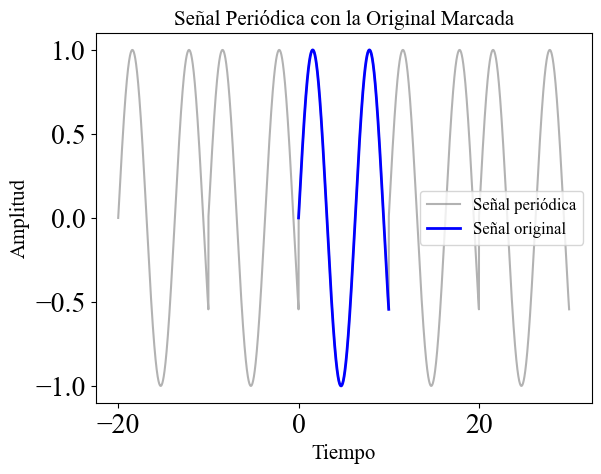

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal original
x = np.linspace(0, 10, 1000)  # Dominio original
y = np.sin(x) / np.max(np.sin(x))  # Señal normalizada

# Número de repeticiones a izquierda y derecha
n_repeats = 2

# Crear copias desplazadas de la señal
x_left = [x - 10 * i for i in range(n_repeats, 0, -1)]
x_right = [x + 10 * i for i in range(1, n_repeats + 1)]

x_periodic = np.concatenate(x_left + [x] + x_right)
y_periodic = np.tile(y, 2 * n_repeats + 1)

# Graficar la señal periódica
plt.plot(x_periodic, y_periodic, label="Señal periódica", color='gray', alpha=0.6)
plt.plot(x, y, label="Señal original", color='blue', linewidth=2)  # Marcar la señal original
# plt.axvline(0, color='r', linestyle='--', label="Centro")

plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal Periódica con la Original Marcada")
plt.show()


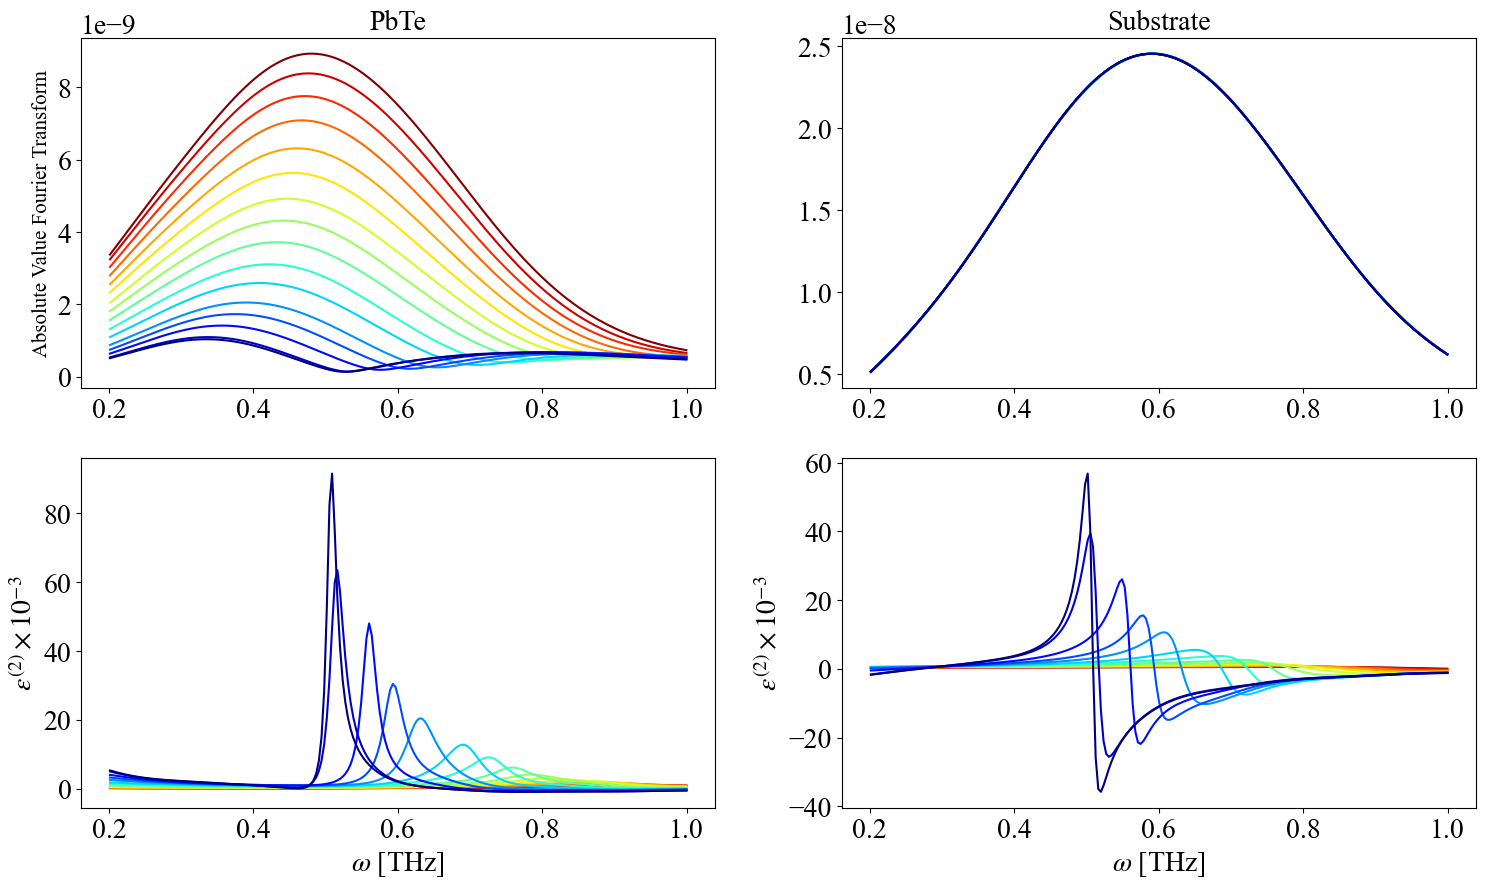

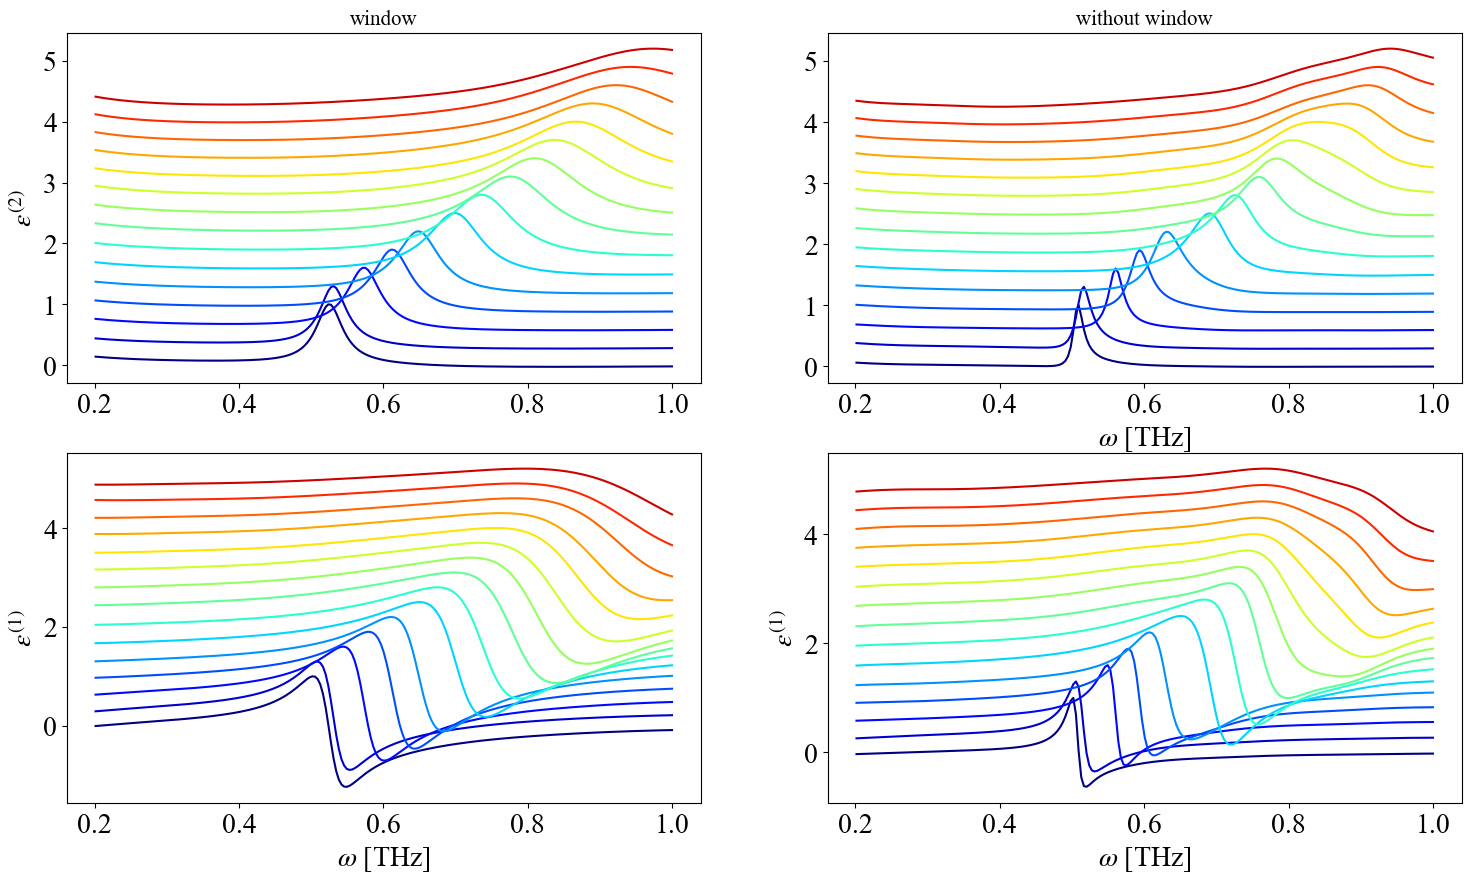

In [28]:
# Leer los archivos .dat
# f = plt.figure(figsize=(15,13))
permitividade_window = []
permitividade = []
temps = []
N = 2**13

fig = plt.figure(figsize=(18, 10))
for i,j in enumerate(archivos_ordenados_s[::-1]):


    path_signal = os.path.join(path_analisis,j)
    path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[0])
    temps.append(extraer_temperatura(path_signal))
    # params_window = ['gaussian', 46.78]
    params_window = ['barthann']
    x,y = getFilterdata(path_signal,nk1,nk0)
    x_ref,y_ref = getFilterdata(path_ref,nk2,nk0)
   
    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,nk0,nk1,nk2,params_window)
    # Datos substrate
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal

    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada =  FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada =  FourierT2(y_subs_ventana,N)[1:len(nu)//k]
    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]


    # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    fft_y_signal = fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]

    
    # phase = idx_max_signal-idx_max_substrate

    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

    n = 2.6

    
    permitividade_window.append(ep_con)
    permitividade.append(ep_sin)


    plt.subplot(221)
    plt.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada), label='FFT SIGNAL',color = colors[i])
    plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
    plt.title('PbTe',fontsize=20)
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    #plt.legend()

    plt.subplot(222)
    plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada), label='FFT SUBSTRATE',color = colors[i])
    plt.title('Substrate',fontsize=20)
    #plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    # plt.legend()



    plt.subplot(223)
    plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3,color = colors[i])
    
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$',fontsize=20)
    plt.xlabel(r'$\omega$ [THz]',fontsize=20)
    # plt.legend()
# 

    plt.subplot(224)
    plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, label='with window '+str(extraer_temperatura(archivos_ordenados_s[i]))+' K',color = colors[i])
    #plt.yscale('log')
    
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$',fontsize=20)
    # plt.xlabel(r'$\omega$ [THz]',fontsize=20)
    plt.xlabel('$\omega$ [THz]',fontsize=20)
    #plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
    #plt.legend()


fig, (ax1, ax2) = plt.subplots(2,2,figsize=(18, 10))
offset = 0.3  # Desplazamiento vertical entre las curvas
cont = 0
for i in range(1,len(permitividade_window),1):
    ep_window = permitividade_window[-i]
    ep = permitividade[-i]
    ax1[0].plot(nu_filtradas, np.imag(ep_window)/max(np.imag(ep_window)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
    ax1[0].set_ylabel(r'$\epsilon^{(2)}$',fontsize=20)
    ax1[0].set_title('window')

    ax1[1].plot(nu_filtradas, np.imag(ep)/max(np.imag(ep)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
    ax1[1].set_title('without window')
    ax1[1].set_xlabel(r'$\omega$ [THz]',fontsize=20)
    #ax2.set_ylabel(r'$\epsilon^{(2)}$',fontsize=20)
    #ax1.set_title('Sample: '+sample)
    ax2[0].plot(nu_filtradas, np.real(ep_window)/max(np.real(ep_window)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
    ax2[0].set_ylabel(r'$\epsilon^{(1)}$',fontsize=20)
    ax2[0].set_xlabel(r'$\omega$ [THz]',fontsize=20)
    #ax2.set_title('Sample: '+sample)
    ax2[1].plot(nu_filtradas, np.real(ep)/max(np.real(ep)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
    ax2[1].set_xlabel(r'$\omega$ [THz]',fontsize=20)
    ax2[1].set_ylabel(r'$\epsilon^{(1)}$',fontsize=20)
   # plt.legend(loc='upper right')
    cont+=1

In [12]:
Temp = [extraer_temperatura(archivos_ordenados_s[i]) for i in range(len(archivos_ordenados_s))]
# del Temp[:2]

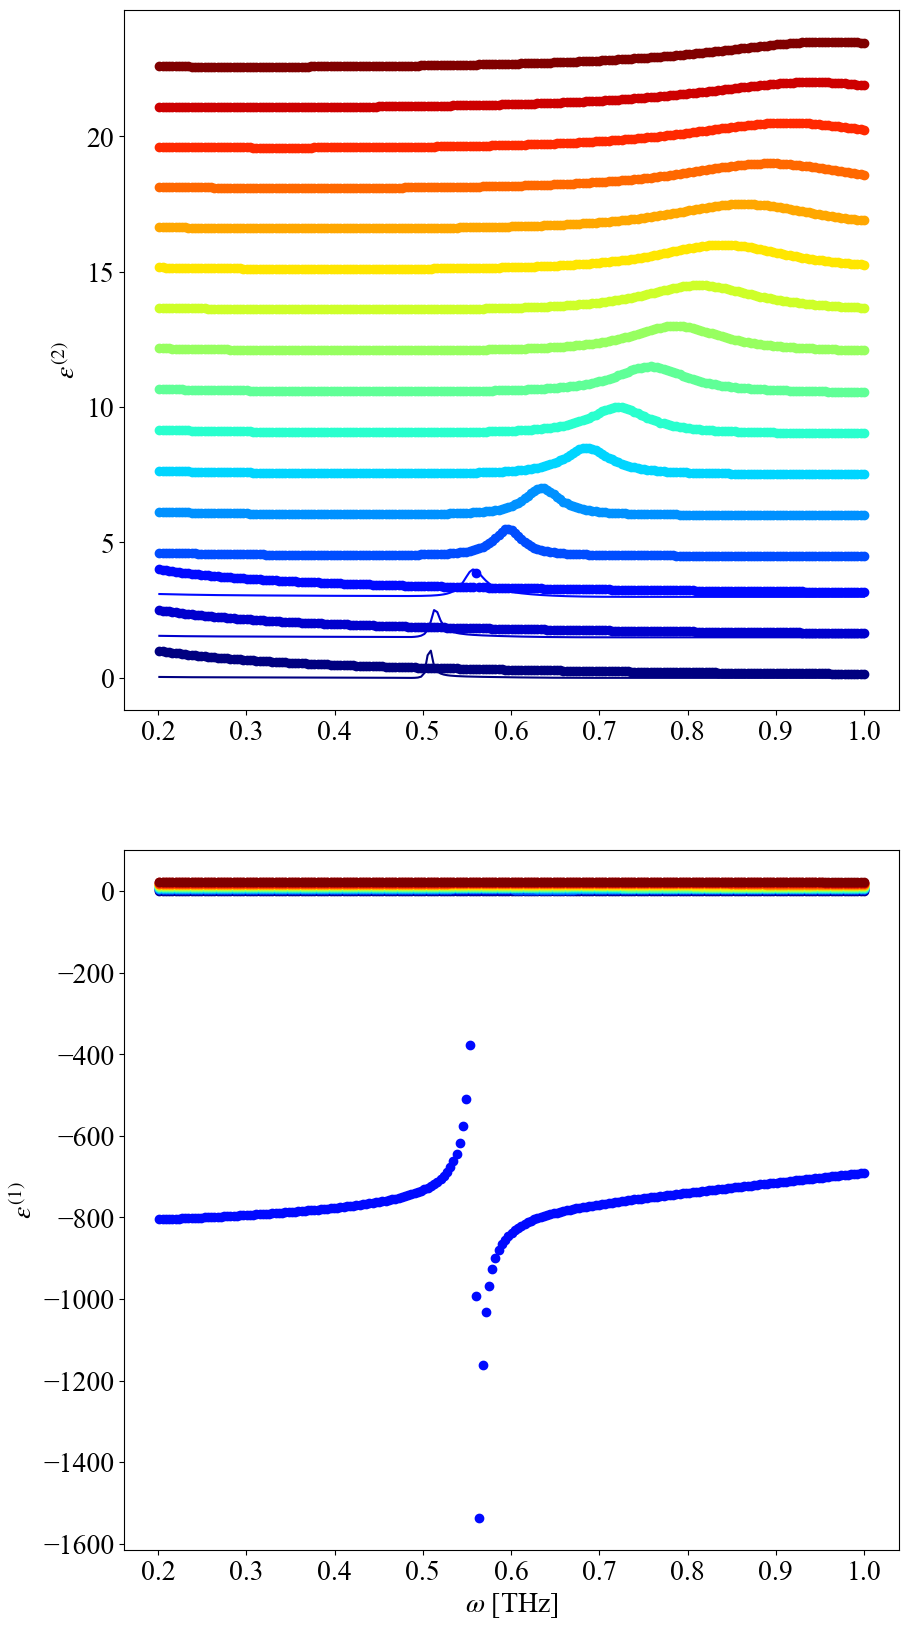

In [13]:
ep_inf,ep_s,nu_to,Gamma,nu_p,gamma = [],[],[],[],[],[]
#ep_inf,ep_s,nu_to,Gamma,nu_p,gamma = [],[],[],[]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10, 20))

cont = 0
offset = 1.5
for permit in permitividade[::-1]: ##

    yNoisy = permit
    yReal = np.real(yNoisy)
    yImag = np.imag(yNoisy)
    params = fit_complex_drude(nu_filtradas,yNoisy,[])
    ep_inf.append(params[0])
    ep_s.append(params[1])
    nu_to.append(params[2])
    Gamma.append(params[3])
    nu_p.append(params[4])
    gamma.append(params[5])

    yFit =  epsilon_drude(nu_filtradas, *params)

    ax1.plot(nu_filtradas, np.imag(permit )/max(np.imag(permit )) + cont * offset, color=colors[-cont-1], label=f'T: {round(temps[-i],3)} K')
    ax1.plot(nu_filtradas, np.imag(yFit)/max(np.imag(yFit)) + cont * offset,'o',color=colors[-cont-1], label=f'T: {round(temps[-i],3)} K')
    #ax1.set_xlabel(r'$\nu$ [THz]',fontsize=15)
    ax1.set_ylabel(r'$\epsilon^{(2)}$',fontsize=20)
    #ax1.set_title('Sample: '+sample)
    ax2.plot(nu_filtradas, np.real(permit)/max(np.real(permit)) + cont * offset, color=colors[-cont-1], label=f'T: {round(temps[-i],3)} K')
    ax2.plot(nu_filtradas, np.real(yFit)/max(np.real(yFit)) + cont * offset,'o',color=colors[-cont-1], label=f'T: {round(temps[-i],3)} K')
    ax2.set_ylabel(r'$\epsilon^{(1)}$',fontsize=20)
    ax2.set_xlabel(r'$\omega$ [THz]',fontsize=20)
    #ax2.set_title('Sample: '+sample)
    # plt.legend(loc='upper right')

    cont+=1

# nu_to_window = []
# for permit in permitividade_window[::-1]: ##

#     yNoisy = permit
#     yReal = np.real(yNoisy)
#     yImag = np.imag(yNoisy)
#     params = fit_complex(nu_filtradas,yNoisy,[])
#     nu_to_window.append(params[2])


# del ep_inf[:2]  # Elimina los primeros dos elementos
# del ep_s[:2]  # Elimina los primeros dos elementos
# del nu_to[:2]  # Elimina los primeros dos elementos
# del Gamma[:2]  # Elimina los primeros dos elementos
# del ep_inf[:2]  # Elimina los primeros dos elementos

# temp_parameters, pcovBoth = curve_fit(T_crit,Temp,nu_to, maxfev=5000)
temp_parameters_window, pcovBoth = curve_fit(T_crit,Temp,nu_to, maxfev=5000)

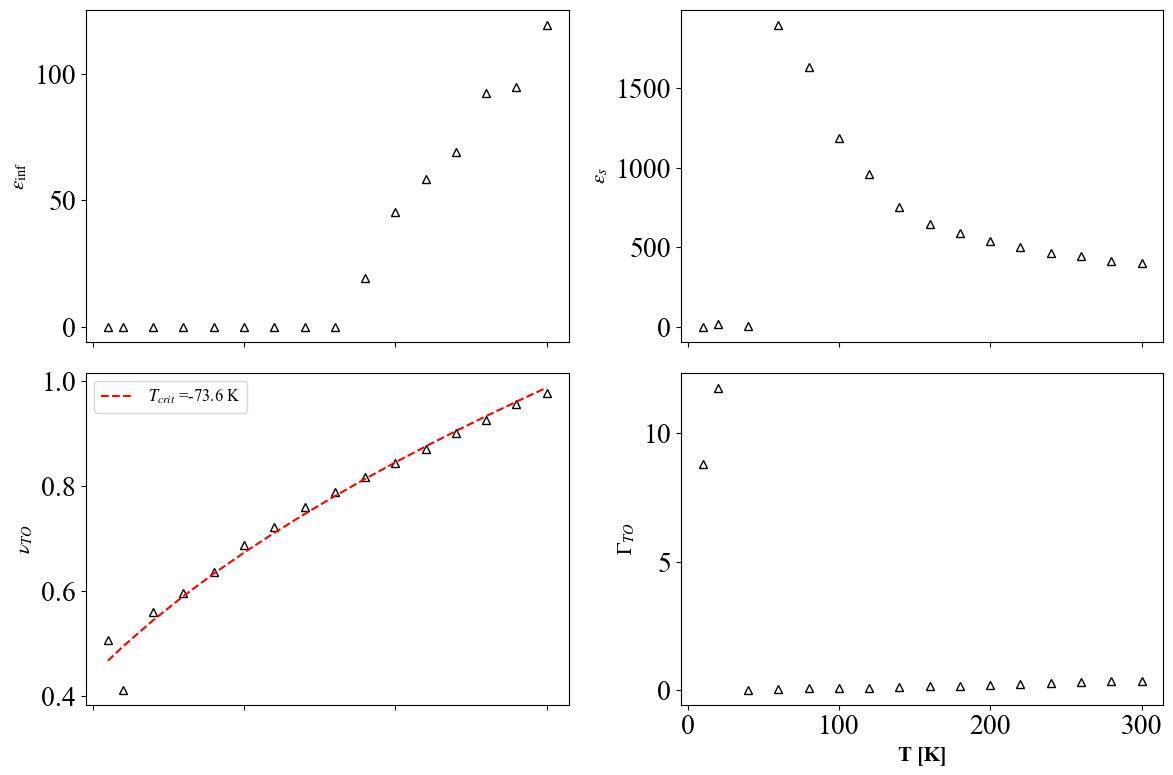

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Tamaño ajustado

# Listas de los datos y títulos
y_data = [ep_inf, ep_s, nu_to, Gamma]
titles = ['$\epsilon_{\inf}$', '$\epsilon_{s}$', r'$\nu_{TO}$', '$\Gamma_{TO}$', r'$\nu_p$', '$\gamma$']

# Iterar sobre los ejes y dibujar los gráficos
for i, ax in enumerate(axes.flat):
    #ax.plot(Temp[::-1], y_data[i], marker='^', color='black')
    ax.plot(Temp, y_data[i], marker='^', color='black', linestyle='none', markerfacecolor='none')
    #ax.set_title(titles[i])
    #ax.set_xlabel('x')
    ax.set_ylabel(titles[i], fontweight='bold',fontsize=15)

    if i==2:
        ax.plot(Temp,T_crit(Temp,*temp_parameters_window),'--r',label =r'$T_{crit}$ =' +str(round(temp_parameters_window[1],2))+' K' )
        ax.legend()
    if i <3:
        ax.set_xticklabels([])
    if i >= 3:  # Fila 2
        ax.set_xlabel('T [K]', fontweight='bold',fontsize=15)
        
    #ax.set_ylabel(titles[i])
    #ax.grid(True)  # Agregar grillas para mejor visualización

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


Text(0.5, 0, '$\\omega$ [THz]')

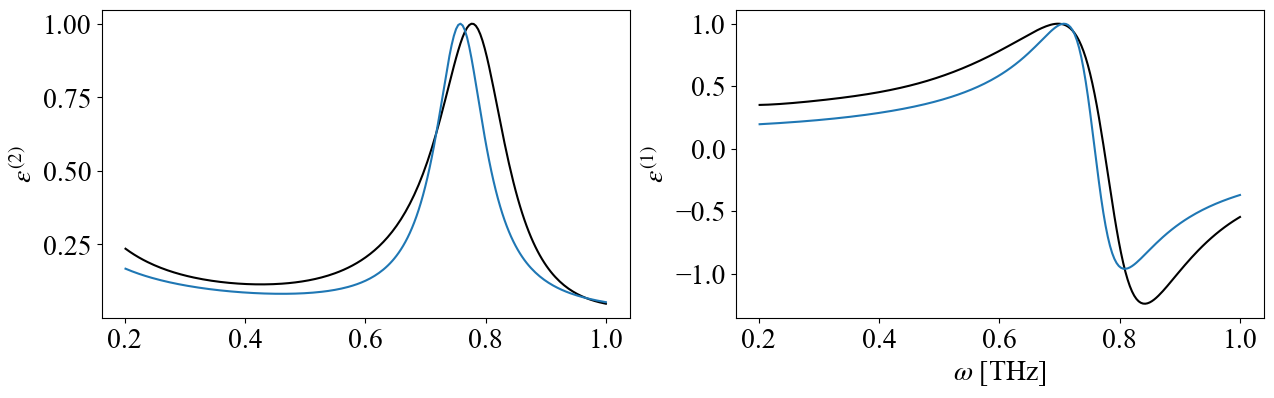

In [51]:
l = 7
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 4))
ex1 =  permitividade_window[::-1][l]
params = [ep_inf[l],ep_s[l],nu_to[l],Gamma[l],nu_p[l],gamma[l]]
yFit = epsilon_drude(nu_filtradas, *params)


ax1.plot(nu_filtradas, np.imag(ex1)/max(np.imag(ex1)),'k' )
ax1.plot(nu_filtradas, np.imag(yFit)/max(np.imag(yFit)))
#ax1.set_xlabel(r'$\nu$ [THz]',fontsize=15)
ax1.set_ylabel(r'$\epsilon^{(2)}$',fontsize=20)
#ax1.set_title('Sample: '+sample)
ax2.plot(nu_filtradas, np.real(ex1)/max(np.real(ex1)),'k')
ax2.plot(nu_filtradas, np.real(yFit)/max(np.real(yFit)))
ax2.set_ylabel(r'$\epsilon^{(1)}$',fontsize=20)
ax2.set_xlabel(r'$\omega$ [THz]',fontsize=20)
#ax2.set_title('Sample: '+sample)

# Rehaciendo el campo electrico

In [46]:
def E_trans(nu,E_ref,d,n,deltal,epsil):

    return E_ref*np.exp(-2*np.pi*1j*nu*(1-n)*deltal/c)*(-1j*(epsil+n)/(1+n)*2*np.pi*nu*d/c+1)**-1

In [206]:
extraer_temperatura(archivos_ordenados_s[0])

10.0

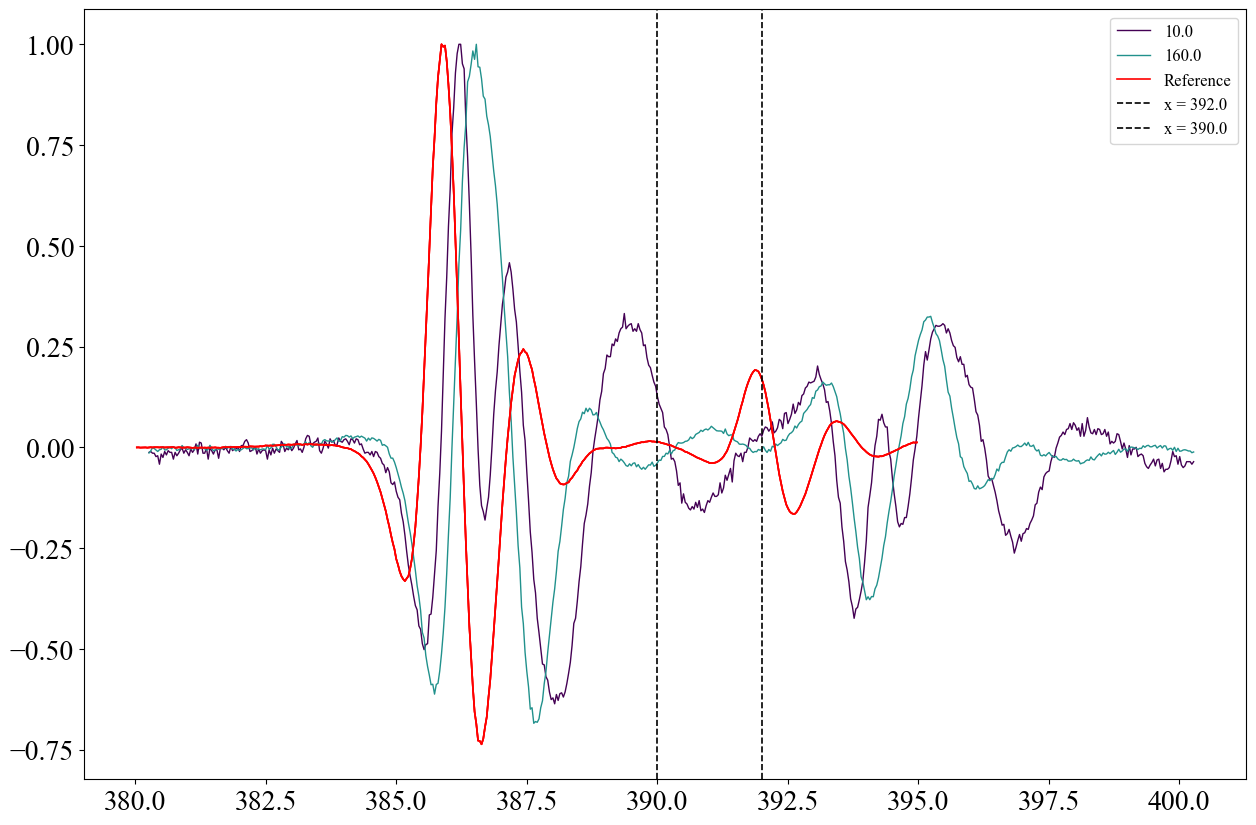

In [230]:
fig = plt.figure(figsize=(15, 10))  




# Lista de colores para las líneas experimentales
colores = plt.cm.viridis(np.linspace(0, 1, len(range(0, len(archivos_ordenados_s), 6))))

for idx, l in enumerate(range(0, len(archivos_ordenados_s), 8)):
    
    path_signal = os.path.join(path_analisis, archivos_ordenados_s[l])  # Señal experimental.
    
    x, y = getFilterdata(path_signal, 410, nk0)

    # Asignar un color distinto de la lista
    plt.plot(x, y / max(y), label=f'{extraer_temperatura(archivos_ordenados_s[l])}', 
             linewidth=1.0, color=colores[idx])
    
    # La señal de referencia en rojo con grosor reducido
    plt.plot(x_ref, y_ref / max(y_ref), 'r', linewidth=1.2)

x_ref, y_ref = getFilterdata(path_ref, 395, nk0)
plt.plot(x_ref, y_ref / max(y_ref), 'r',label='Reference', linewidth=1.2)

plt.axvline(x=nk1, color='k', linestyle='--', linewidth=1.2, label=f'x = {nk1}')
plt.axvline(x=nk2, color='k', linestyle='--', linewidth=1.2, label=f'x = {nk2}')

plt.legend()
plt.show()

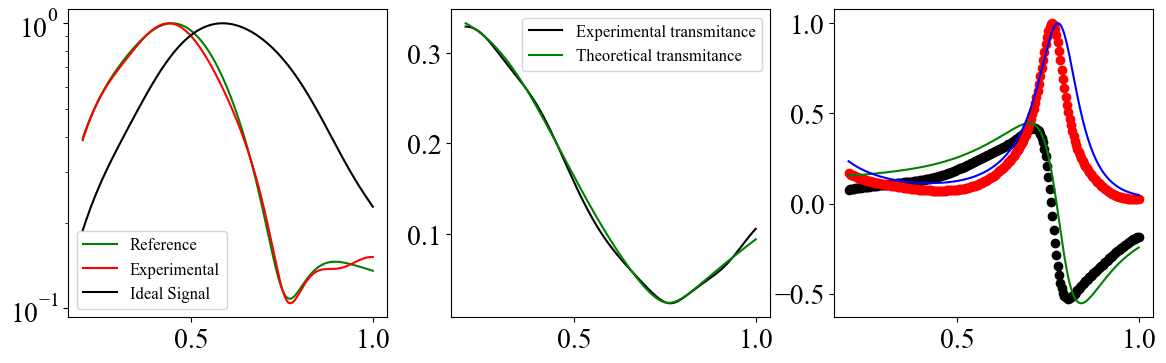

In [185]:
l = 7
path_signal = os.path.join(path_analisis,archivos_ordenados_s[l])  # Señal experimental.
x,y = getFilterdata(path_signal,nk1,nk0)
params = [ep_inf[l],ep_s[l],nu_to[l],Gamma[l],nu_p[l],gamma[l]]
nu = sp.fft.fftfreq(N, 1/30)
k = 15  
x_ref,y_ref = getFilterdata(path_ref,nk2,nk0)
fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]
fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
nu = nu[1:len(nu)//k]
xmin, xmax = 0.2, 1.0
mask = (nu >= xmin) & (nu <= xmax)
nu_filtradas = nu[mask]
yFit = epsilon_drude(nu_filtradas, *params)
ex1 = yFit
fft_y_subs = fft_y_subs[mask]
fft_y_signal= fft_y_signal[mask]
fft_theor = E_trans(nu_filtradas,fft_y_subs,d,n,delta_ls_corr,ex1)

f = plt.figure(figsize=(14,4))

plt.subplot(131)
plt.plot(nu_filtradas,np.abs(fft_theor)/max(np.abs(fft_theor)),'g',label='Reference')
plt.plot(nu_filtradas,np.abs(fft_y_signal)/max(np.abs(fft_y_signal)),'r',label='Experimental')
plt.plot(nu_filtradas,np.abs(fft_y_subs)/max(np.abs(fft_y_subs)),'k',label='Ideal Signal')
plt.yscale('log')
plt.yscale('log')
plt.legend()

T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
n = 2.6
ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*delta_ls_corr)-n



plt.subplot(132)
plt.plot(nu_filtradas,abs(fft_y_signal/fft_y_subs),'k',label='Experimental transmitance')
plt.plot(nu_filtradas,abs(fft_theor/fft_y_subs),'g',label='Theoretical transmitance')
plt.legend()

plt.subplot(133)
plt.plot(nu_filtradas,np.real(ep_sin)/max(np.imag(ep_sin)),'ko',label='Theoretical transmitance')
plt.plot(nu_filtradas,np.imag(ep_sin)/max(np.imag(ep_sin)),'ro',label='Theoretical transmitance')
plt.plot(nu_filtradas,np.real(permitividade_window[::-1][l])/max(np.imag(permitividade_window[::-1][l])),'g',label='experimental transmitance')
plt.plot(nu_filtradas,np.imag(permitividade_window[::-1][l])/max(np.imag(permitividade_window[::-1][l])),'b',label='experimental transmitance')


# Efecto de ventanas en los parametros

In [84]:
import scipy.signal.windows as win

def apply_window(params):
    """
    Aplica una ventana de scipy a una señal.

    Parámetros:
    - params (list): Lista con los siguientes elementos:
      1. Nombre de la ventana (str).
      2. Tamaño de la ventana (M) (int).
      3. Parámetros adicionales de la ventana (opcional).

    Retorna:
    - ventana (array): La ventana calculada.
    """
    try:
        # Extrae el nombre de la ventana y el tamaño M de la lista
        window_name = params[0]
        M = params[1]
        extra_params = params[2:]  # Parámetros adicionales para la ventana

        # Obtiene la función de ventana a partir del nombre
        window_func = getattr(win, window_name)
        
        # Aplica la ventana con M como primer argumento y los parámetros adicionales
        window = window_func(M, *extra_params)
        return window
    except AttributeError:
        raise ValueError(f"Ventana '{window_name}' no está disponible en scipy.signal.windows.")
    except TypeError as e:
        raise ValueError(f"Error al pasar los parámetros a la ventana: {e}")


In [162]:
def ventaneando_señal(l,params):
    
    nu = sp.fft.fftfreq(N, 1/30)
    params = [ep_inf[l],ep_s[l],nu_to[l],Gamma[l],nu_p[l],gamma[l]]
    x_ref,y_ref = getFilterdata(path_ref,nk2,nk0)
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]
    yFit = epsilon_drude(nu[1:len(nu)//k], *params)
    fft_theor = E_trans(nu[1:len(nu)//k],fft_y_subs,d,n,delta_ls_corr,yFit)
    E_time = sp.fft.fftshift(FourierI(fft_theor,N))
    # params_window = ['gaussian', 40]
    params_window.insert(1,len(E_time))
    ventana = apply_window(params_window)
    idx_max_window = np.argmax(ventana)
    idx_max_signal = np.argmax(E_time)
    desp_hacia_ventana = idx_max_window - idx_max_signal
    # MOVIENDO TANTO LA SEÑAL COMO EL SUBSTRATO HACIA EL MAXIMO DE LA VENTANA
    y_desplazada_max = np.roll(E_time,desp_hacia_ventana)


    xmin, xmax = 0.2, 1.0
    ff = FourierT(y_desplazada_max*ventana,N)[1:len(nu)//k]
    nu = nu[1:len(nu)//k]
    mask = (nu >= xmin) & (nu<= xmax)
    nu_filtradas = nu[mask]
    fft_theor = fft_theor[mask]
    ff = ff[mask]
    fft_y_subs = fft_y_subs[mask]

    return nu_filtradas, ff/fft_y_subs, fft_theor/fft_y_subs

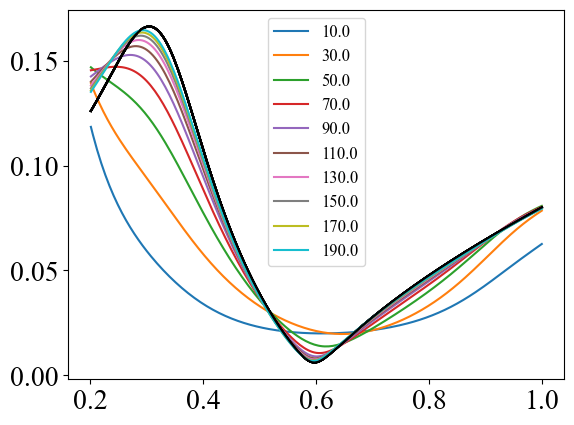

In [182]:
values = np.linspace(10,190,10)
# plt.plot(nu,abs(T_theor),'k',label='Theoretical transmitance')
l = 3
for j in values:
    params_window = ['gaussian', j]
    nu, T_theor, T_exp = ventaneando_señal(l,params)

    plt.plot(nu,abs(T_theor),label=f'{j}')
    plt.plot(nu,abs(T_exp),'k')

plt.legend()

C:\Users\esteb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\esteb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


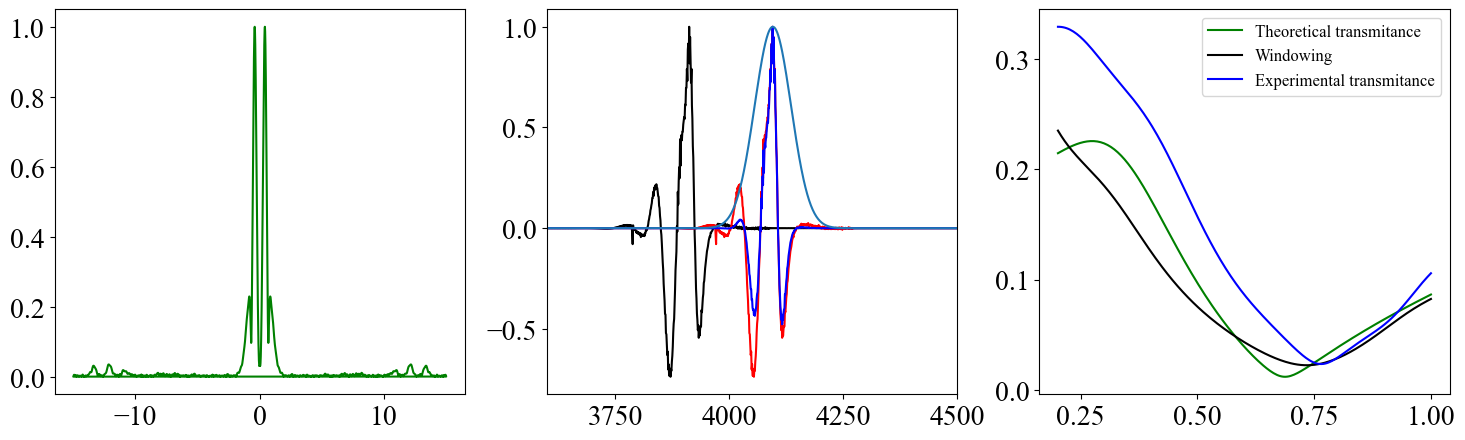

In [149]:
n = 2.6
nu = sp.fft.fftfreq(N, 1/30)
k = 1
l = 5
params = [ep_inf[l],ep_s[l],nu_to[l],Gamma[l],nu_p[l],gamma[l]]
x_ref,y_ref = getFilterdata(path_ref,nk2,nk0)
fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]
nu = nu[1:len(nu)//k]
nu_filtradas = nu
yFit = epsilon_drude(nu_filtradas, *params)
ex1 = yFit


fft_theor = E_trans(nu_filtradas,fft_y_subs,d,n,delta_ls_corr,ex1)
params_window = ['gaussian', 40]


E_time = sp.fft.fftshift(FourierI(fft_theor,N))

# params_window = ['barthann']
params_window.insert(1,len(E_time))
ventana = apply_window(params_window)
idx_max_window = np.argmax(ventana)
idx_max_signal = np.argmax(E_time)
desp_hacia_ventana = idx_max_window - idx_max_signal
# MOVIENDO TANTO LA SEÑAL COMO EL SUBSTRATO HACIA EL MAXIMO DE LA VENTANA
y_desplazada_max = np.roll(E_time,desp_hacia_ventana)
# y_substrate_padding_max = np.roll(y_substrate_padding,desp_hacia_ventana)


f = plt.figure(figsize=(18,5))

plt.subplot(131)
plt.plot(nu_filtradas,np.abs(fft_theor)/max(np.abs(fft_theor)),'g',label='Reference')

plt.subplot(132)
plt.plot(E_time/max(E_time),'k',label='Signal')
plt.plot(y_desplazada_max/max(y_desplazada_max),'r',label='Signal desplazada')
plt.plot(y_desplazada_max*ventana/max(y_desplazada_max*ventana),'b',label='Signal + window')
plt.plot(ventana)
plt.xlim(3600,4500)


plt.subplot(133)
xmin, xmax = 0.2, 1.0
mask = (nu >= xmin) & (nu <= xmax)
nu_filtradas = nu[mask]
fft_theor = fft_theor[mask]
nu = sp.fft.fftfreq(N, 1/30)
ff = FourierT(y_desplazada_max*ventana,N)[1:len(nu)//k]
nu = nu[1:len(nu)//k]
ff = ff[mask]
fft_y_subs = fft_y_subs[mask]

# plt.plot(nu_filtradas,abs(fft_y_signal/fft_y_subs),'k',label='Theoretical transmitance')
plt.plot(nu_filtradas,abs(fft_theor/fft_y_subs),'g',label='Theoretical transmitance')
plt.plot(nu_filtradas,abs(ff/fft_y_subs),'k',label='Windowing')
plt.plot(nu_filtradas,abs(fft_y_signal/fft_y_subs),'b',label='Experimental transmitance')
plt.legend()
# plt.plot(nu_filtradas,np.abs(fft)/max(np.abs(ff)),'k',label='Ideal Signal')

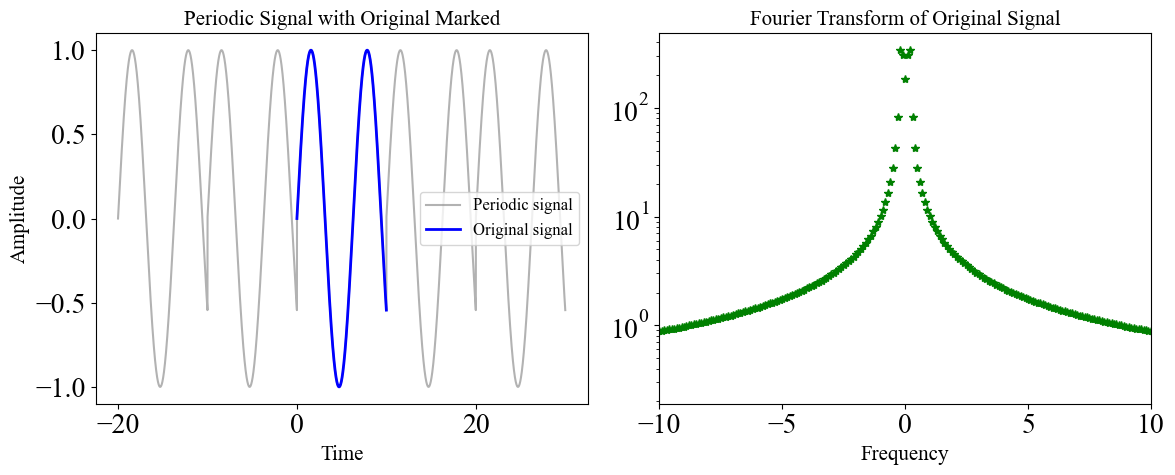

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal original
x = np.linspace(0, 10, 1000)  # Original domain
y = np.sin(x) / np.max(np.sin(x))  # Normalized signal

# Número de repeticiones a izquierda y derecha
n_repeats = 2

# Crear copias desplazadas de la señal
x_left = [x - 10 * i for i in range(n_repeats, 0, -1)]
x_right = [x + 10 * i for i in range(1, n_repeats + 1)]

x_periodic = np.concatenate(x_left + [x] + x_right)
y_periodic = np.tile(y, 2 * n_repeats + 1)

# Transformada de Fourier
freqs = np.fft.fftfreq(len(x), d=(x[1] - x[0]))  # Frecuencias
fft_y = np.fft.fft(y)  # FFT de la señal original
fft_y_magnitude = np.abs(fft_y)  # Magnitud de la FFT

# Graficar la señal periódica y su transformada de Fourier
fig = plt.figure(figsize=(12, 5))

plt.subplot(121)
# Gráfica de la señal periódica
plt.plot(x_periodic, y_periodic, label="Periodic signal", color='gray', alpha=0.6)
plt.plot(x, y, label="Original signal", color='blue', linewidth=2)
# plt.axvline(0, color='r', linestyle='--', label="Center")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Periodic Signal with Original Marked")
plt.legend()

# Gráfica de la Transformada de Fourier
plt.subplot(122)
plt.plot(freqs, fft_y_magnitude, '*',color='green')
plt.xlabel("Frequency")
plt.yscale('log')
plt.xlim(-10,10)
# plt.ylabel("Magnitude")
plt.title("Fourier Transform of Original Signal")


plt.tight_layout()
plt.show()
